In [1]:
import re
import glob
import numpy as np
import pandas as pd

import matplotlib.cbook
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import cartopy
import cartopy.crs as ccrs

In [9]:
file_list = glob.glob('/mnt/Data/Data/PF/DF_SA/*.csv')
file_list = sorted(file_list)
len_files = len(file_list)
print(len_files)
file_list[0:3]

85


['/mnt/Data/Data/PF/DF_SA/rgpf_201403_level2.csv',
 '/mnt/Data/Data/PF/DF_SA/rgpf_201404_level2.csv',
 '/mnt/Data/Data/PF/DF_SA/rgpf_201405_level2.csv']

In [10]:
count = 0
for nn in range(len_files):
    file_in = file_list[nn].split('/')[-1]

    file_tmp = re.split('[_ |. ]', file_in)[1]
    year = file_tmp[0:4]
    month = file_tmp[4:6]

    if month == '01' or month == '02' or month == '12':

        if count == 0:
            data_tmp = pd.read_csv(file_list[nn])
            data = data_tmp

        else:
            data_tmp = pd.read_csv(file_list[nn])
            data = pd.concat([data, data_tmp])

        print(year, month, count, len(data_tmp), len(data))

        count += 1

2014 12 0 28453 28453
2015 01 1 27027 55480
2015 02 2 26543 82023
2015 12 3 26250 108273
2016 01 4 27092 135365
2016 02 5 26561 161926
2016 12 6 29852 191778
2017 01 7 31504 223282
2017 02 8 30581 253863
2017 12 9 30140 284003
2018 01 10 32942 316945
2018 02 11 32699 349644
2018 12 12 29499 379143
2019 01 13 33514 412657
2019 02 14 31201 443858
2019 12 15 33091 476949
2020 01 16 33249 510198
2020 02 17 32024 542222
2020 12 18 35355 577577
2021 01 19 38796 616373
2021 02 20 33639 650012


In [13]:
# export dataframe to csv
salida = '/mnt/Data/Data/PF/DF_SA_season/rgpf_2014_2021_summer.csv'
print(f'Exporting data to {salida}')
data.to_csv(salida,header=True,index=False)

Exporting data to /mnt/Data/Data/PF/DF_SA_season/rgpf_2014_2021_summer.csv


In [11]:
data

,lat,lon,NPIXELS_30DBZ,NPIXELS_40DBZ,NPIXELS_50DBZ,NPIXELS_30MM,NPIXELS_40MM,NPIXELS_50MM,NSNOWPIXELS_KU,NSNOWPIXELS_GMI,NSTRAT_KU,NCONV_KU,MIN85PCT,MAXHT40
0,14.920553,-82.734344,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,287.109955,0.000
1,14.809609,-81.027560,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,282.770752,0.000
2,14.286827,-80.558685,26.0,3.0,0.0,0.0,0.0,0.0,0.0,73.0,30.0,39.0,264.541260,4.875
3,13.910675,-81.263054,13.0,1.0,0.0,0.0,0.0,0.0,0.0,40.0,9.0,29.0,259.803040,2.625
4,12.447679,-80.457310,122.0,12.0,0.0,0.0,0.0,0.0,0.0,405.0,108.0,267.0,257.963409,3.375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33634,13.845942,-71.477130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,285.289978,0.000
33635,14.455017,-72.425964,3.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,6.0,282.926483,0.000
33636,14.396589,-72.042496,3.0,1.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,15.0,281.317627,2.000
33637,14.537724,-72.597115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,285.821106,0.000


In [14]:
product = 'rgpf'

Exporting figure as ../images/rgpf_maxht40.png


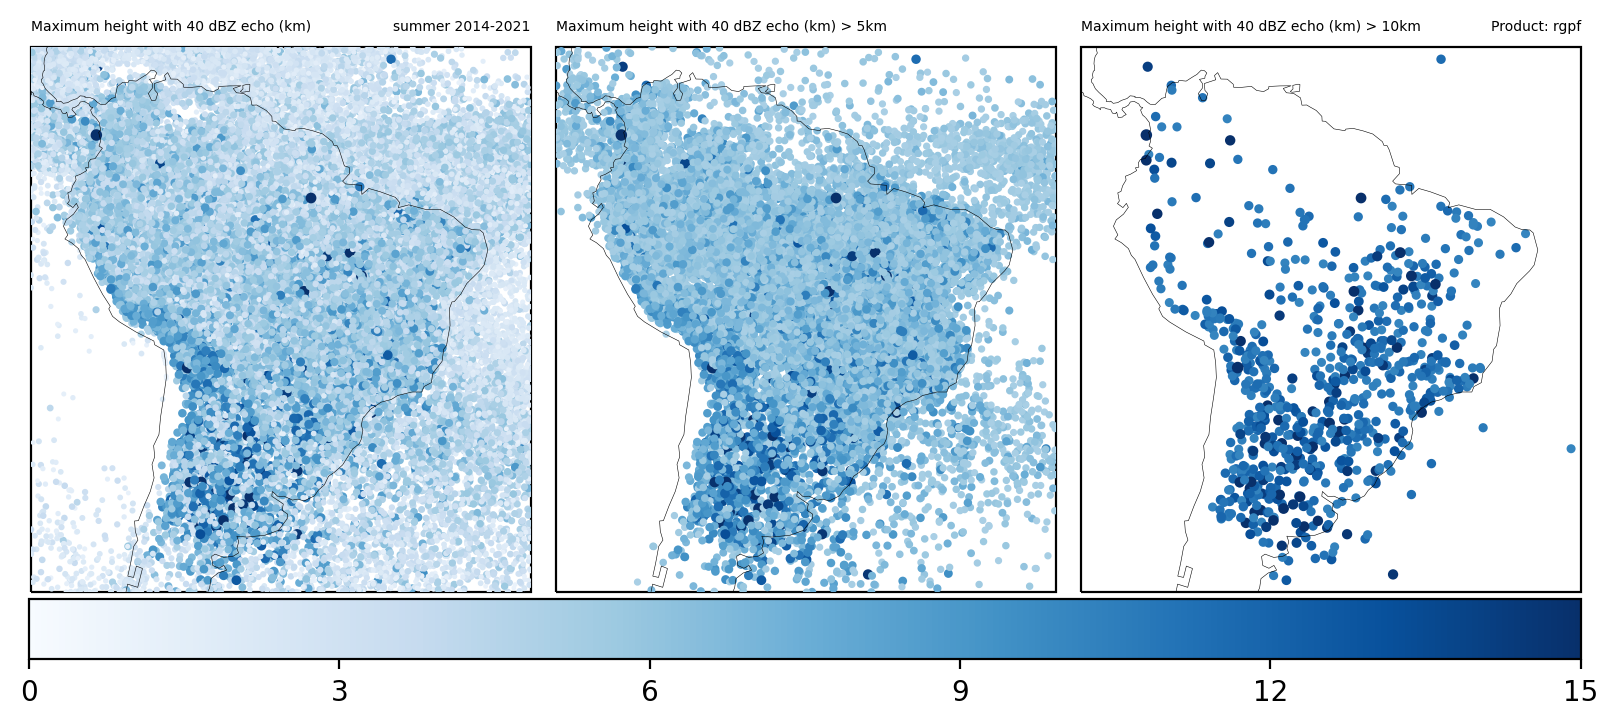

In [17]:
alt_ref = 5
alt_ref2 = 10

proj = ccrs.PlateCarree()
cmap = plt.cm.Spectral_r
cmap = plt.cm.Blues

ticks = np.arange(0,18,3)

fig = plt.figure(figsize=(10,6),dpi=200)
gs = gridspec.GridSpec(1,3)

ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.coastlines(linestyle='-',linewidth=0.2,color='black',zorder=4)
ax1.set_extent([-85,-30,-45,15],crs=proj)
a1 = ax1.scatter(data['lon'],data['lat'],c=data['MAXHT40'],cmap=cmap,s=data['MAXHT40']/2,zorder=3,vmin=0, vmax=15)
ax1.set_title('Maximum height with 40 dBZ echo (km)',fontsize=5,loc='left')
ax1.set_title('summer 2014-2021',fontsize=5,loc='right')

ax1 = plt.subplot(gs[0, 1], projection = proj)
ax1.coastlines(linestyle='-',linewidth=0.2,color='black',zorder=4)
ax1.set_extent([-85,-30,-45,15],crs=proj)
a1 = ax1.scatter(data['lon'][data['MAXHT40']>alt_ref],data['lat'][data['MAXHT40']>alt_ref],c=data['MAXHT40'][data['MAXHT40']>alt_ref],
                cmap=cmap,s=data['MAXHT40'][data['MAXHT40']>alt_ref]/2,zorder=3,vmin=0, vmax=15)
ax1.set_title('Maximum height with 40 dBZ echo (km) > '+str(alt_ref)+'km',fontsize=5,loc='left')

ax1 = plt.subplot(gs[0, 2], projection = proj)
ax1.coastlines(linestyle='-',linewidth=0.2,color='black',zorder=4)
ax1.set_extent([-85,-30,-45,15],crs=proj)
a1 = ax1.scatter(data['lon'][data['MAXHT40']>alt_ref2],data['lat'][data['MAXHT40']>alt_ref2],c=data['MAXHT40'][data['MAXHT40']>alt_ref2],
                cmap=cmap,s=data['MAXHT40'][data['MAXHT40']>alt_ref2]/2,zorder=3,vmin=0, vmax=15)
ax1.set_title('Maximum height with 40 dBZ echo (km) > '+str(alt_ref2)+'km',fontsize=5,loc='left')
ax1.set_title('Product: '+product,fontsize=5,loc='right')

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, hspace=0.05, wspace=0.05)

cbaxes = fig.add_axes([0.124, 0.22, 0.776, 0.05])
fig.colorbar(a1, cax = cbaxes,ticks=ticks,orientation="horizontal")

salida = '../images/'+product+'_maxht40.png'
print(f'Exporting figure as {salida}')
plt.savefig(salida,facecolor='white',bbox_inches ='tight',pad_inches = 0.1)